In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [2]:
cols = ['flength','fwidth','fsize','fconc','fconc1','fAsym','fM3long','fM3Trans','fAlpha','fdist','class']
df = pd.read_csv('magic04.data',names=cols)
df.head()

,flength,fwidth,fsize,fconc,fconc1,fAsym,fM3long,fM3Trans,fAlpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['class'] = (df['class'] == 'g').astype(int)

In [4]:
df.head()

,flength,fwidth,fsize,fconc,fconc1,fAsym,fM3long,fM3Trans,fAlpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


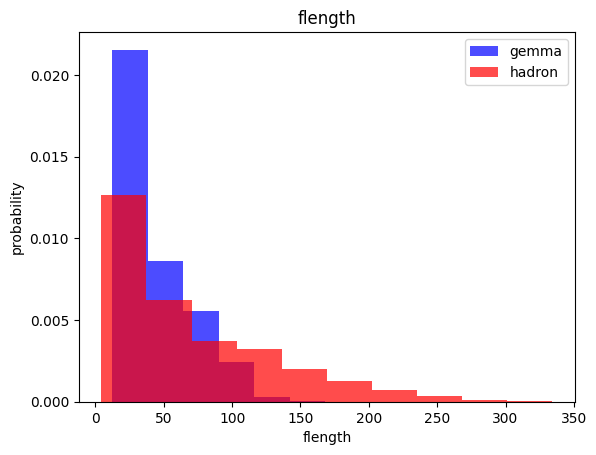

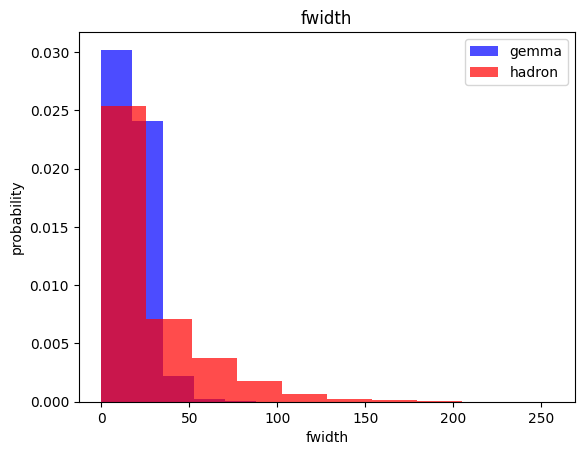

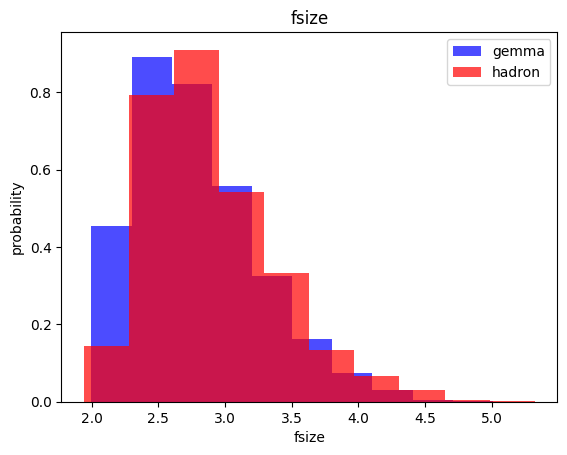

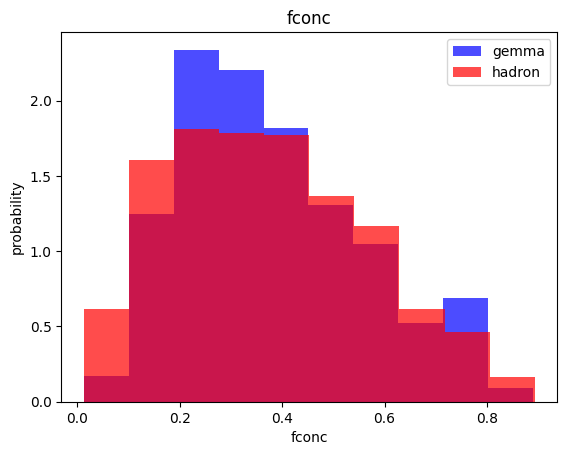

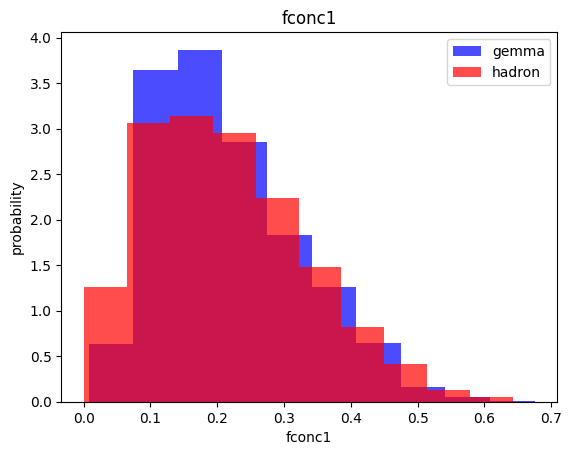

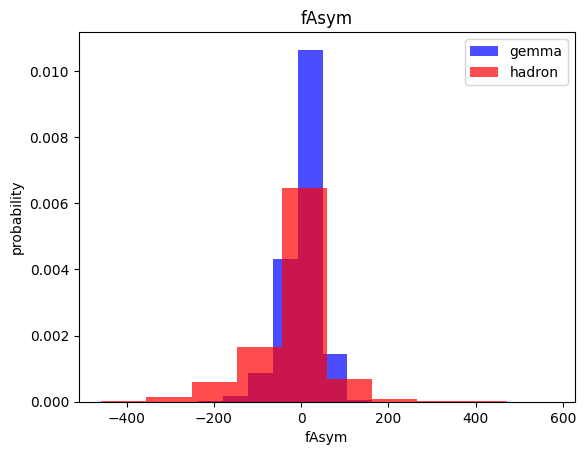

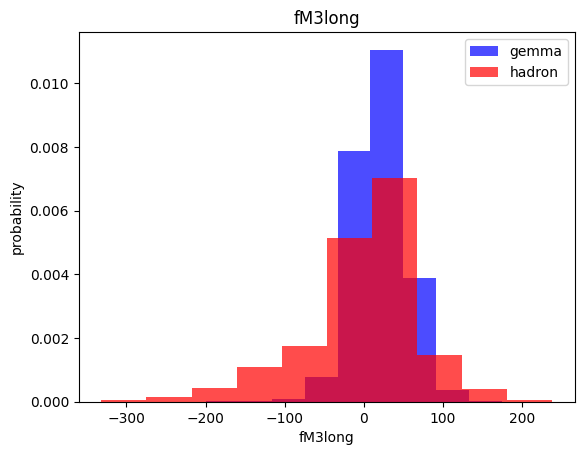

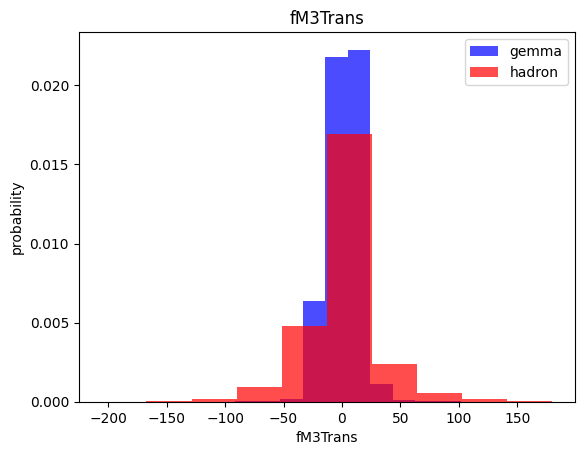

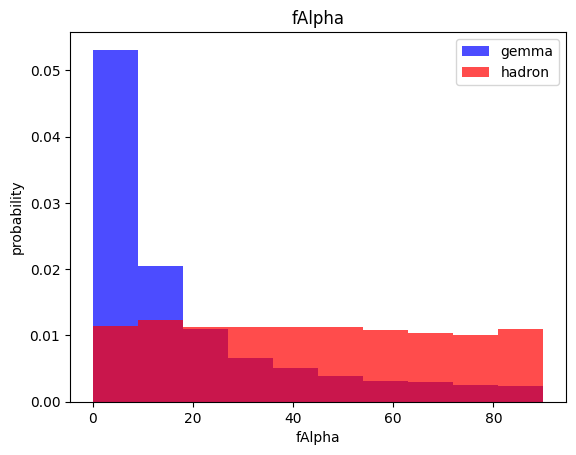

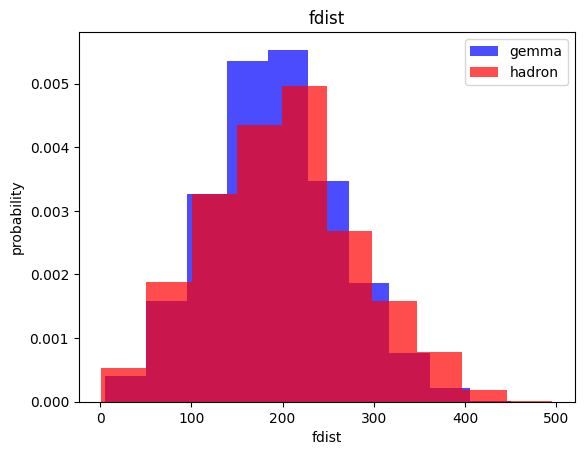

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gemma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

#Train, Valid , test datasets


In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [5]:

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        X_resampled, y_resampled = ros.fit_resample(X, y)
        return X_resampled, y_resampled

    return X, y


In [8]:
x_train, y_train = scale_dataset(train, oversample=True)
x_valid, y_valid = scale_dataset(valid)
x_test, y_test = scale_dataset(test)

In [9]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0]))


7393
4019


In [10]:
len(y_train)

14786

In [11]:
sum(y_train == 1)


7393

In [12]:
sum(y_train == 0)


7393

#kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = knn_model.predict(x_test)


In [16]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [17]:
y_test


array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
report = classification_report(y_test, y_pred, digits=2)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1341
           1       0.84      0.84      0.84      2463

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



## Naive bayes


In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [20]:
y_pred = nb_model.predict(x_test)

In [21]:
print(classification_report(y_test, y_pred,))


              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1346
           1       0.74      0.90      0.81      2458

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



## Log regression

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [25]:
y_pred = lg_model.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred,))


              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1346
           1       0.74      0.90      0.81      2458

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



## SVM


In [26]:
from sklearn.svm import SVC

In [27]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [28]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1346
           1       0.84      0.82      0.83      2458

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#neural network


In [29]:
import tensorflow as tf

In [45]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary conssentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

  def plot_accuracy (history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.lagend()
    plt.grid(True)
    plt.show()

In [35]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')


])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])


In [37]:
history = nn_model.fit(
    x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, #verbose=0
)


Epoch 1/100
370/370 [==============================] - 3s 5ms/step - loss: 0.4583 - accuracy: 0.7894 - val_loss: 0.5852 - val_accuracy: 0.6640
Epoch 2/100
370/370 [==============================] - 2s 4ms/step - loss: 0.3821 - accuracy: 0.8378 - val_loss: 0.5226 - val_accuracy: 0.7458
Epoch 3/100
370/370 [==============================] - 1s 3ms/step - loss: 0.3618 - accuracy: 0.8493 - val_loss: 0.4841 - val_accuracy: 0.7627
Epoch 4/100
370/370 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8515 - val_loss: 0.5473 - val_accuracy: 0.7302
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8553 - val_loss: 0.4999 - val_accuracy: 0.7573
Epoch 6/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8606 - val_loss: 0.4843 - val_accuracy: 0.7623
Epoch 7/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8606 - val_loss: 0.4769 - val_accuracy: 0.7637

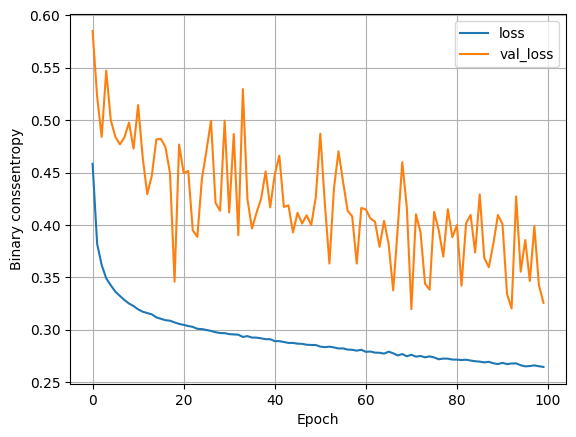

NameError: name 'plot_accuracy' is not defined

In [46]:
plot_loss(history)
plot_accuracy (history)